## **Basic Exploratory Data Analysis**

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import pandas as pd

# Load dataset while preserving the index correctly
lagged_1h_df = pd.read_csv("../data/athens_weather_df_2019_2023.csv", parse_dates=["date"])

lagged_1h_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43823 entries, 0 to 43822
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype              
---  ------                          --------------  -----              
 0   date                            43823 non-null  datetime64[ns, UTC]
 1   month_sin                       43823 non-null  float64            
 2   month_cos                       43823 non-null  float64            
 3   temperature_2m_lag_1h           43823 non-null  float64            
 4   relative_humidity_2m_lag_1h     43823 non-null  float64            
 5   dew_point_2m_lag_1h             43823 non-null  float64            
 6   surface_pressure_lag_1h         43823 non-null  float64            
 7   cloud_cover_low_lag_1h          43823 non-null  float64            
 8   cloud_cover_mid_lag_1h          43823 non-null  float64            
 9   evapotranspiration_lag_1h       43823 non-null  float64            
 10  vapour_pre

### Descriptive statistics of the DataFrame

In [3]:
lagged_1h_df.describe().transpose().round(2)

,count,mean,std,min,25%,50%,75%,max
month_sin,43823.0,-0.00,0.71,-1.00,-0.87,0.00,0.50,1.00
month_cos,43823.0,-0.00,0.71,-1.00,-0.87,0.00,0.87,1.00
temperature_2m_lag_1h,43823.0,18.24,7.93,-2.19,12.21,17.56,24.26,43.81
relative_humidity_2m_lag_1h,43823.0,62.36,18.49,8.38,48.58,64.57,77.69,100.00
dew_point_2m_lag_1h,43823.0,10.00,5.22,-11.04,6.76,10.41,13.76,23.36
surface_pressure_lag_1h,43823.0,1004.17,5.83,973.40,1000.32,1003.65,1007.60,1028.19
cloud_cover_low_lag_1h,43823.0,10.38,23.18,0.00,0.00,0.00,6.00,100.00
cloud_cover_mid_lag_1h,43823.0,14.50,27.04,0.00,0.00,0.00,15.00,100.00
evapotranspiration_lag_1h,43823.0,0.16,0.20,0.00,0.01,0.05,0.24,0.97
vapour_pressure_deficit_lag_1h,43823.0,1.04,0.99,0.00,0.32,0.66,1.45,8.26


From the above descriptive statistics, it is clear that the dataset contains features with vastly different units and scales. Attributes such as temperature, pressure, and wind speed inherently have different ranges and variances.   
Without scaling, features with larger values may disproportionately influence the model, leading to biased or incorrect results.   
Scaling the data ensures that all features contribute equally to the learning process, allowing the model to consider each feature evenly.   
Therefore, it is crucial to scale the data before proceeding with any modeling.

### Class imbalance of the target variable `weather_event`

weather_event
0    40084
1     3676
2       63
Name: count, dtype: int64
weather_event
0    91.467951
1     8.388289
2     0.143760
Name: proportion, dtype: float64


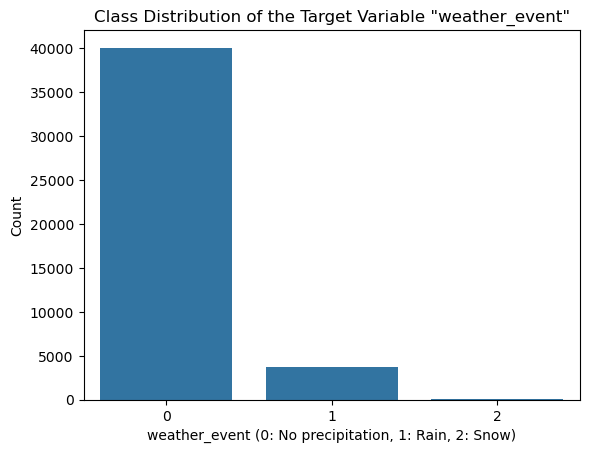

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Checking the class distribution of the target variable 'rain'
class_counts = lagged_1h_df['weather_event'].value_counts()
print(class_counts)

# To see the percentage distribution:
class_percentages = lagged_1h_df['weather_event'].value_counts(normalize=True) * 100
print(class_percentages)

sns.countplot(x='weather_event', data=lagged_1h_df)
plt.title('Class Distribution of the Target Variable "weather_event"')
plt.xlabel('weather_event (0: No precipitation, 1: Rain, 2: Snow)')
plt.ylabel('Count')
plt.show();

The dataset is **severely imbalanced**, with approximately 91.5% of the records representing “no precipitation" events, 8.4% for "rain" events, and only 0.1% for "snowfall" events. This class imbalance is likely to affect the model's performance, as it may become biased toward predicting the majority class (no precipitation) during training.   
To address this issue, an oversampling technique such as SMOTE (Synthetic Minority Over-sampling Technique) should be applied to ensure that the model can learn from the minority classes effectively.   
Additionally, when evaluating the model's performance, we need to focus on metrics like precision, recall and f1-score than relying on accuracy which can lead us to misleading conclusions. 
In our dataset for example, a 'dummy' model that always predicts 0, might achieve a high accuracy of 91.5%, but would completely fail in predicting rain or snowfall events, which was the purpose it was built for.

### Duplicated records and missing values

In [5]:
import numpy as np
lagged_1h_df.duplicated().sum().item()

0

When preparing data for modeling with scikit-learn, it's crucial to ensure there are no missing (null) values, as most algorithms in scikit-learn cannot handle them. If missing values are present, the model will fail to execute. To handle this, you can use techniques like imputation (e.g., replacing missing values with the median or more advanced techniques).   
If the dataset is large enough and the missing values are minimal, removing these records can also be an option, as long as the data's <u>distributions are not distorted.</u>   
You can find useful information about missing data imputation in the **[official documentation](https://scikit-learn.org/stable/modules/impute.html)** of scikit-learn library.

In [6]:
lagged_1h_df.isna().sum()

date                              0
month_sin                         0
month_cos                         0
temperature_2m_lag_1h             0
relative_humidity_2m_lag_1h       0
dew_point_2m_lag_1h               0
surface_pressure_lag_1h           0
cloud_cover_low_lag_1h            0
cloud_cover_mid_lag_1h            0
evapotranspiration_lag_1h         0
vapour_pressure_deficit_lag_1h    0
wind_speed_10m_lag_1h             0
wind_gusts_10m_lag_1h             0
soil_temp_0_to_7cm_lag_1h         0
soil_moist_0_to_7cm_lag_1h        0
direct_radiation_lag_1h           0
weather_event                     0
dtype: int64

### The correlation matrix

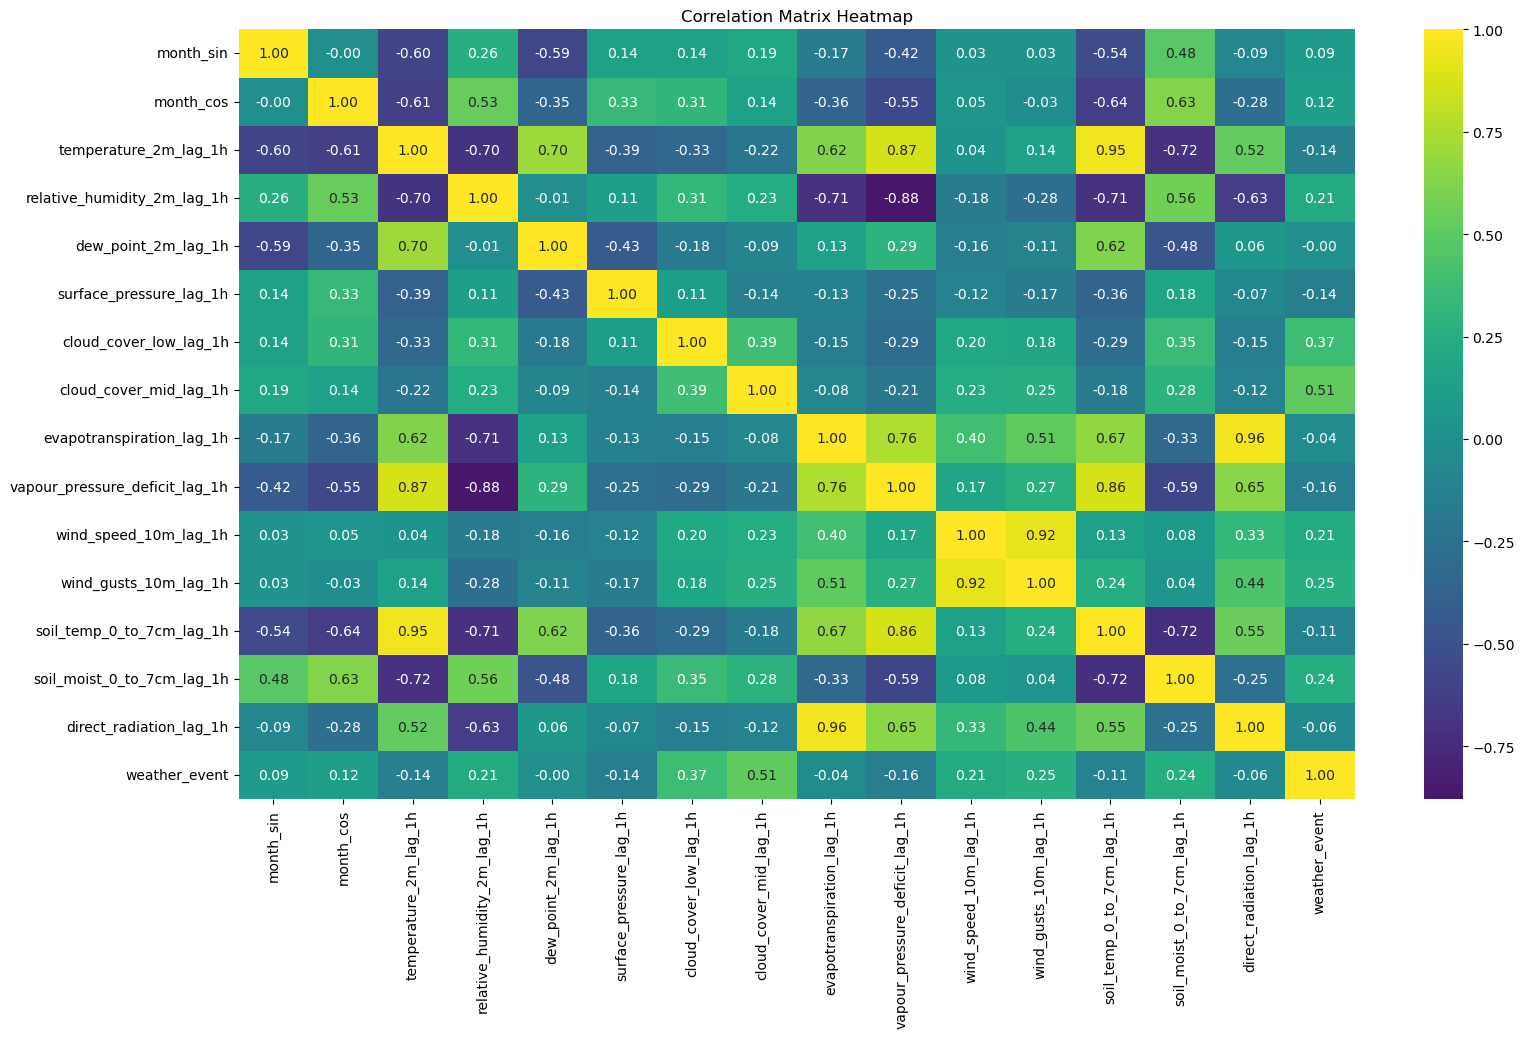

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = lagged_1h_df.corr(numeric_only = True, method = 'pearson')

# Create the heatmap
figure = plt.figure(figsize=(18, 10));
heatmap = sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='viridis', center=0)

# Add a title
title = plt.title('Correlation Matrix Heatmap')

# Display the heatmap
plt.show()

There are several strong correlations among the variables, with values well above 0.75. Some pairs of variables show correlations as high as -0.88, 0.92, or even 0.96!

### The issue of multicollinearity

One common approach when dealing with strongly correlated variables is to remove one variable from each highly correlated pair—the one that proves to be less contributive to the model's outcome.   
This can be based on the variables/features contribution to the model's performance, which can only be evaluated after modeling.   
So, in this case rerunning the model is necessary to assess the impact on performance after each variable removal, making this an iterative process that requires time and patience.

An alternative approach is Principal Component Analysis (PCA), a technique used to reduce the dimensionality of the dataset and handle multicollinearity. PCA transforms correlated variables into uncorrelated principal components. However, the downside of this technique is that while it effectively addresses multicollinearity, it results in a model that is difficult to interpret. Since the transformed components do not correspond directly to the original features, and thus the concept of feature importance becomes less useful in cases, interpretability is important. 

Feature engineering and Interaction Terms is another approach, but it definitely demands Domain knowledge and experience on this particular field, so this is not an option for us also.   

What remains as an option to handle the issue of collinearity and multicollinearity is Regularization.   
Specifically, using L2 Regularization penalty within Logistic Regression class allows us to keep all variables, even if they are highly correlated, by shrinking their coefficients.   
This addresses multicollinearity (*to an extent*), without losing interpretability while at the same time it helps control overfitting and provides a more balanced model without removing critical features or transforming them into less interpretable forms.   
The good news is that the `LogisticRegression()` class of scikit-learn, uses by default for the penalty argument the l2 term and therefore we will leave multicollinearity to be handled (to an extent of course) internally by the algorithm.

Therefore, we will retain all features in our dataset and let the algorithm mitigate the effects of multicollinearity during the modeling process.

### Plotting the predictor distributions

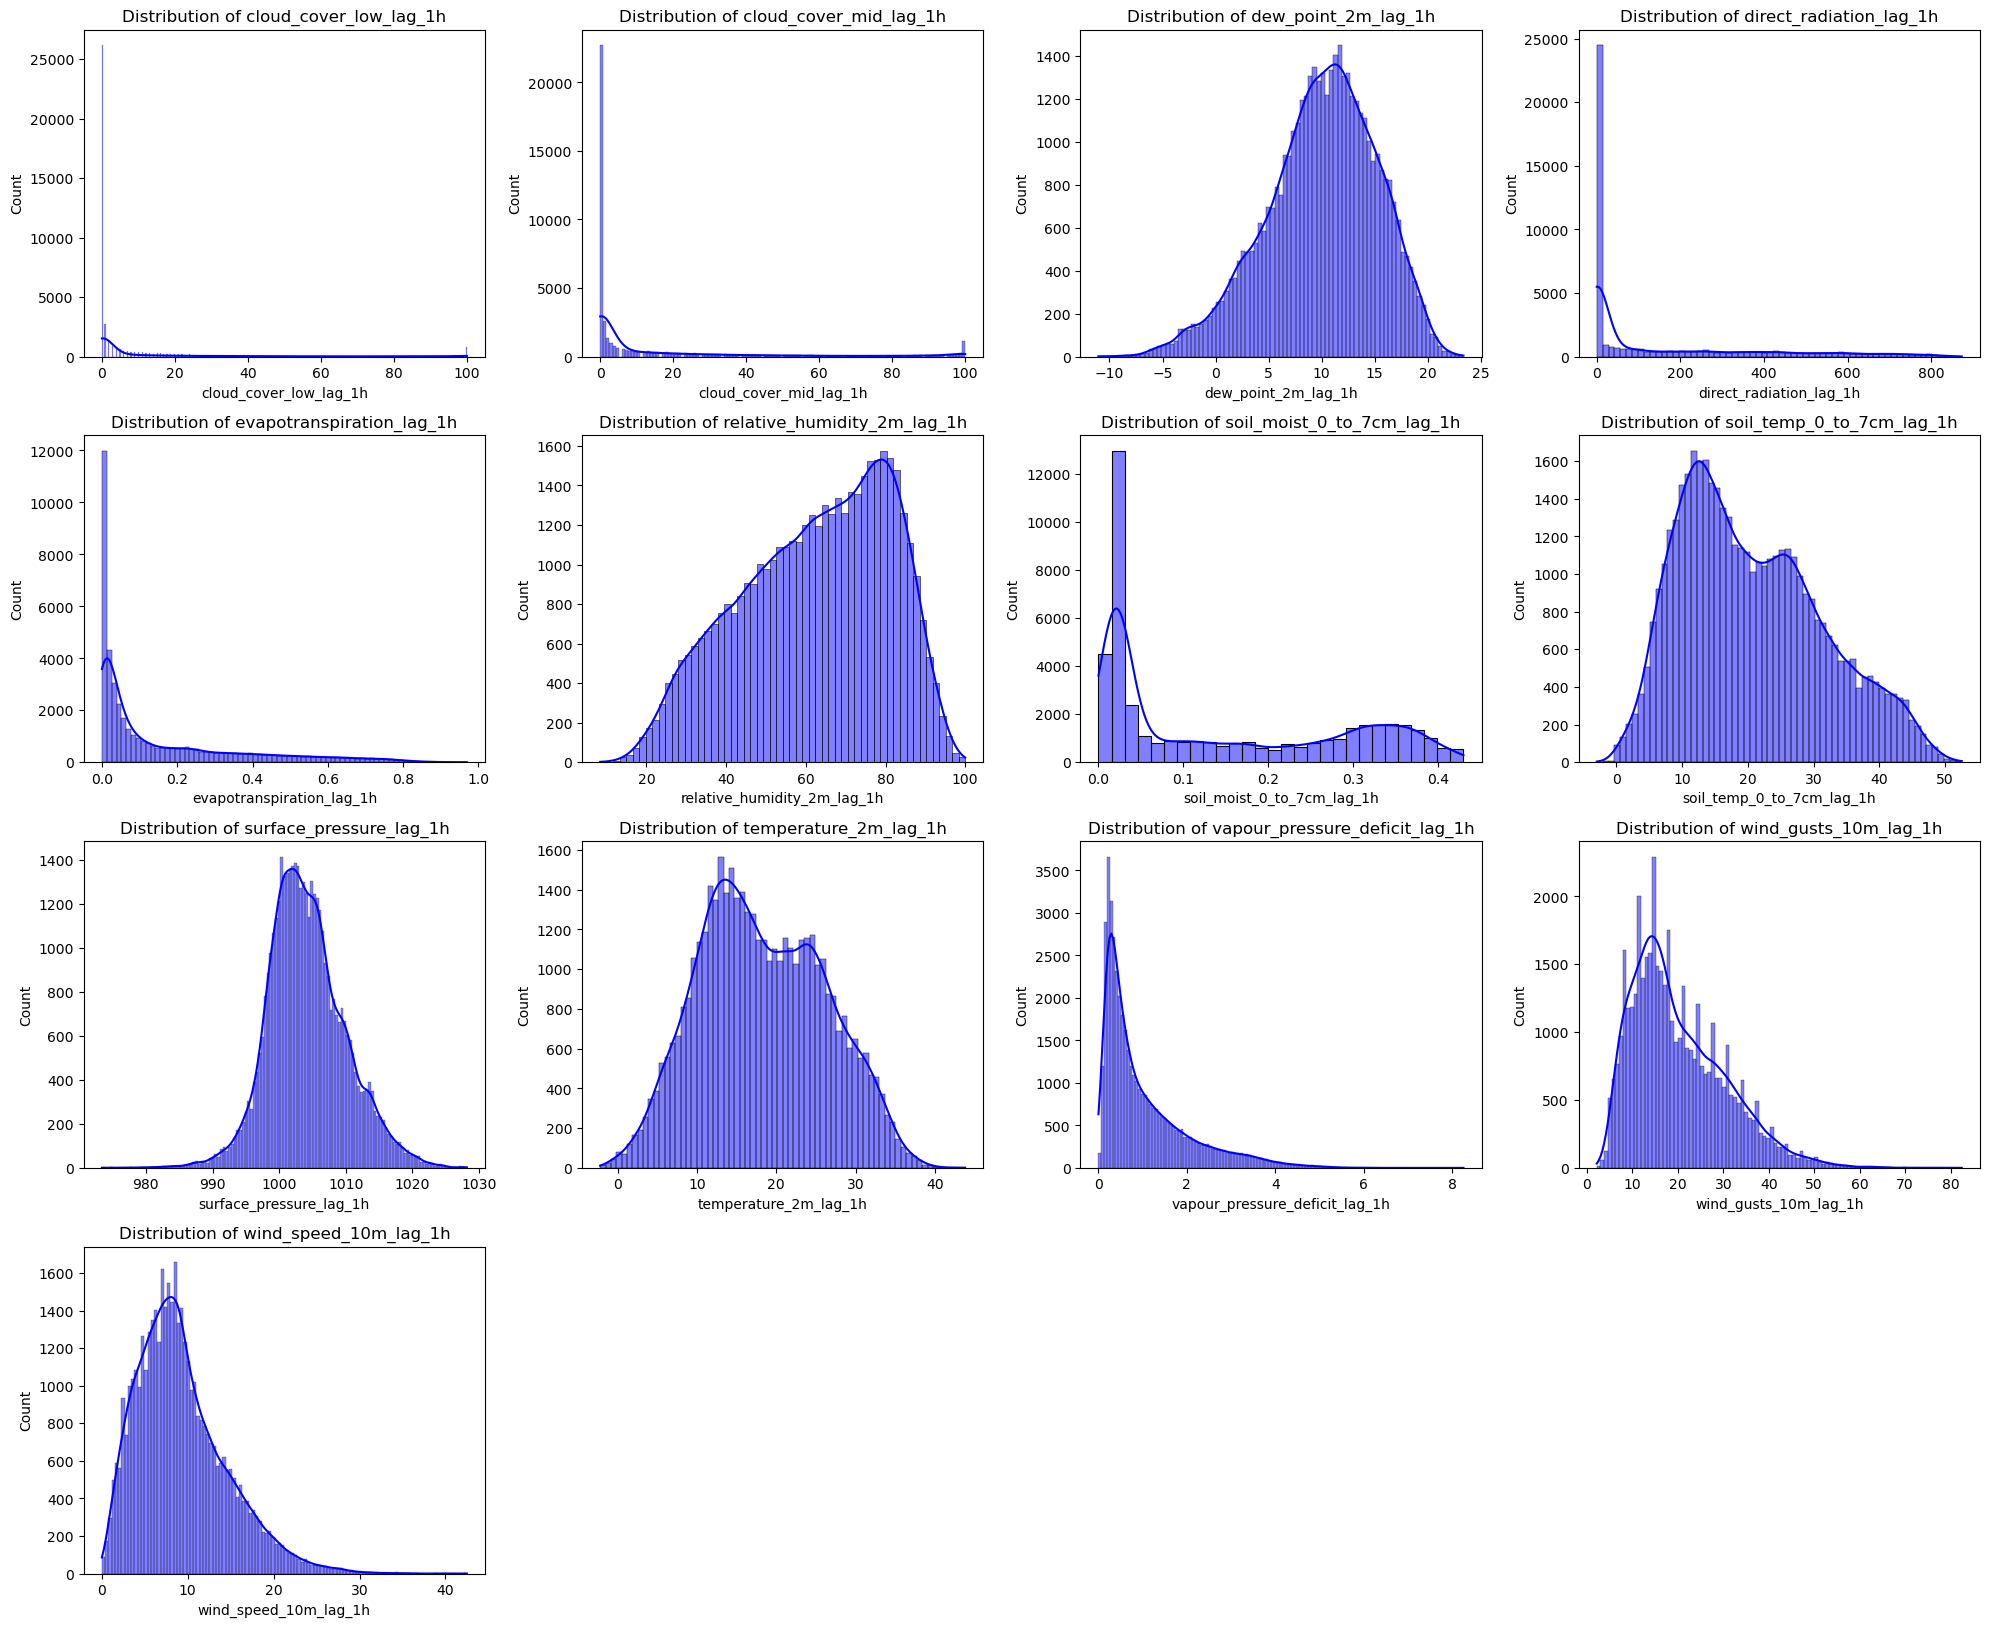

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of columns to plot
columns_to_plot = lagged_1h_df.columns.difference(['date', 'month_sin', 'month_cos', 'weather_event'])

figure = plt.figure(figsize=(20, 20))  # Adjusted for better spacing

# Loop through each column and create a distribution (histogram)
for i, col in enumerate(columns_to_plot, start=1):
    subplot = plt.subplot(len(columns_to_plot)//3 + 1, 4, i)
    histplot = sns.histplot(lagged_1h_df[col], kde=True, color='blue')
    
    title = plt.title(f'Distribution of {col}', fontsize=12) 

# Adjust the layout for better visual spacing
layout = plt.tight_layout()
plt.show()

From the distribution plots there are several conclusions we can derive, such as:
- 'surface_pressure' and 'dew_point_2m' display more symmetrical distributions, suggesting that the values for these variables are distributed more evenly around a central point. They can be well approximated from the normal distribution and therefore easier to predict
- 'evapotranspiration' and 'vapour_pressure' are highly right-skewed. This means that most of their values are concentrated close to 0, indicating that extreme values to the right tail are rare, and most likely will be indicated as outliers
- the values in features like 'relative_humidity' and 'wind_gusts' are spread across a wider range, which could imply that these features fluctuate significantly over time
- just like spotted in the descriptive statistics table, the varying scales of some distributions (some are tightly concentrated around a single value, while others are spread out over a large range) are evident, and therefore it is crucial to use scaling methods like `RobustScaler` or `StandardScaler` before applying machine learning algorithms, to prevent certain features from dominating due to their wider range.

### Feature Transformation

In cases where variables deviate significantly from a Gaussian distribution, particularly those with high positive skewness or heavily tailed (high kurtosis), it may be necessary to apply a transformation to approximate normality.   

Many machine learning models and statistical techniques assume normality, as variables with a Gaussian-like distribution can lead (but not guarantee) to better model performance and more reliable inferences. The Yeo-Johnson transformation is one such method, particularly useful for handling variables that include zero or negative values. Unlike the logarithmic and square root transformations, which are constrained to non-negative values, Yeo-Johnson can be applied to this range of values, making it a valuable transformation tool.   

However, the effectiveness of this or any transformation is not guaranteed and may not improve the model's performance.   
The process is iterative: you apply the transformation, evaluate the results, and reassess if needed.   

Apart from observing visually the predictors distributions you can approach the task numerically and spot the variables that need a transformation and lead to a potential increase of the model’s performance by computing the skewness and kurtosis of each predictor variable.   
If the values for these statistics exceed a certain threshold, then the predictor can be a serious candidate for transformation.
A general rule of thumb is that a Kurtosis value above 4 captures heavy-tailed variables and a Skewness value above or below ±1 captures significantly asymmetric variables. These are the values we will also use as the threshold to spot the predictors in the data set that need further processing through Yeo-Johnson transformation.   

Further information about feature transformation can be found in the links below:   
https://www.analyticsvidhya.com/blog/2021/05/feature-transformations-in-data-science-a-detailed-walkthrough/   
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html

In [9]:
from scipy.stats import skew, kurtosis

# Step 1: Filter numeric columns
numeric_cols = lagged_1h_df.select_dtypes(include=['float64'])  

# Step 2: Set thresholds
skew_threshold = 1
kurt_threshold = 4

# Step 3: Calculate skewness and kurtosis for numeric columns
skewness = numeric_cols.apply(lambda col: skew(col.dropna()), axis=0)  # Drop NA to avoid errors
kurt = numeric_cols.apply(lambda col: kurtosis(col.dropna()), axis=0)

# Step 4: Identify variables exceeding thresholds
skewed_cols = skewness[abs(skewness) > skew_threshold].index.tolist()
high_kurt_cols = kurt[kurt > kurt_threshold].index.tolist()

# Step 5: Combine results
variables_to_transform = list(set(skewed_cols + high_kurt_cols))

# Display results
print("Skewness:\n", skewness)
print("\nKurtosis:\n", kurt)
print("\nVariables to consider for transformation:\n", variables_to_transform)

Skewness:
 month_sin                         0.010383
month_cos                         0.009882
temperature_2m_lag_1h             0.150352
relative_humidity_2m_lag_1h      -0.364575
dew_point_2m_lag_1h              -0.433369
surface_pressure_lag_1h           0.271559
cloud_cover_low_lag_1h            2.679972
cloud_cover_mid_lag_1h            2.087792
evapotranspiration_lag_1h         1.476539
vapour_pressure_deficit_lag_1h    1.603305
wind_speed_10m_lag_1h             0.933274
wind_gusts_10m_lag_1h             0.919205
soil_temp_0_to_7cm_lag_1h         0.491411
soil_moist_0_to_7cm_lag_1h        0.541594
direct_radiation_lag_1h           1.432146
dtype: float64

Kurtosis:
 month_sin                        -1.495498
month_cos                        -1.503180
temperature_2m_lag_1h            -0.675764
relative_humidity_2m_lag_1h      -0.785740
dew_point_2m_lag_1h              -0.027962
surface_pressure_lag_1h           0.730309
cloud_cover_low_lag_1h            6.390515
cloud_cover_mid_

In [10]:
import pickle

# Define the exact file name
variables_to_transform_path = "../data/variables_to_transform.pkl"

# Save list to Pickle file
with open(variables_to_transform_path, "wb") as f:
    pickle.dump(variables_to_transform, f)

### Exploring predictor variable distributions across target classes

Another essential and insightful step is to check how predictors behave across different classes of the target variable.   
This step allows us to identify patterns and understand the relationship between predictors and the target classes (`no precipitation`, `rain` and `snowfall`).   
Detecting any significant variation (shape and value counts across classes) in distributions might indicate that a variable could be an important predictor for the occurrence of a class, while similar distributions across classes could suggest a variable with less predictive power.

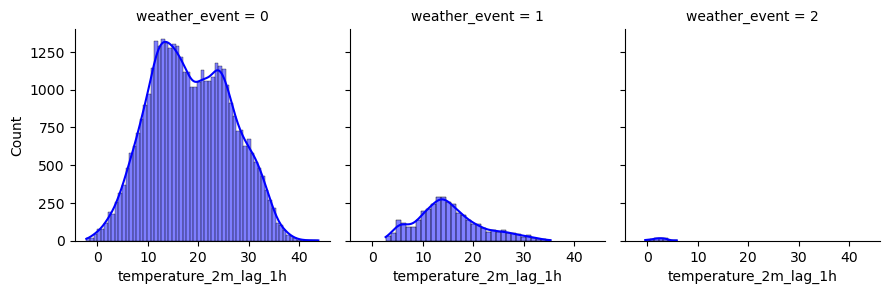

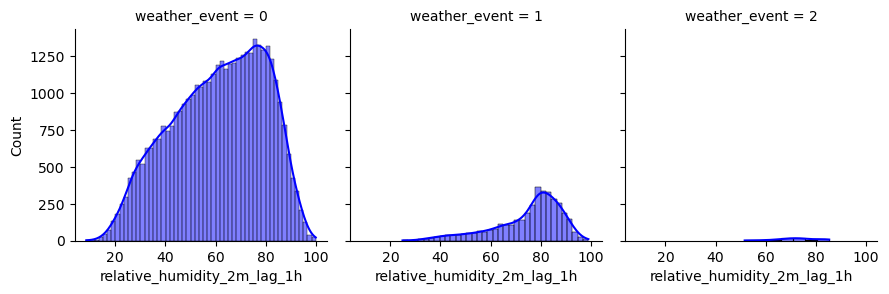

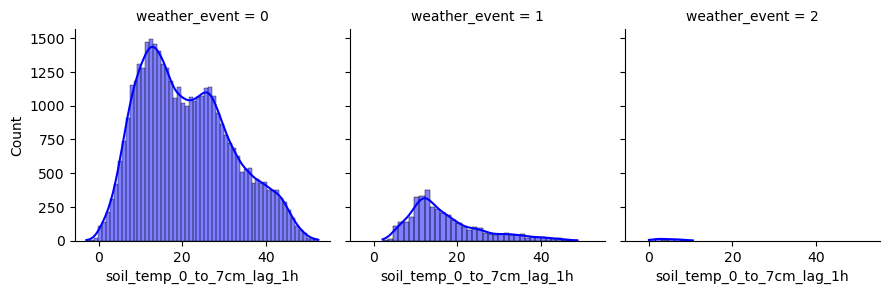

In [11]:
g1 = sns.FacetGrid(lagged_1h_df, col="weather_event", col_wrap=3, height=3)
map1 = g1.map(sns.histplot, "temperature_2m_lag_1h", kde=True, color="blue")  
subplot1 = g1.fig.subplots_adjust(top=0.9)  

g2 = sns.FacetGrid(lagged_1h_df, col="weather_event", col_wrap=3, height=3)
map2 = g2.map(sns.histplot, "relative_humidity_2m_lag_1h", kde=True, color="blue")  
subplot2 = g2.fig.subplots_adjust(top=0.9) 

g3 = sns.FacetGrid(lagged_1h_df, col="weather_event", col_wrap=3, height=3)
map3 = g3.map(sns.histplot, "soil_temp_0_to_7cm_lag_1h", kde=True, color="blue")  
subplot3 = g3.fig.subplots_adjust(top=0.9) 

plt.show()

### Detecting outliers

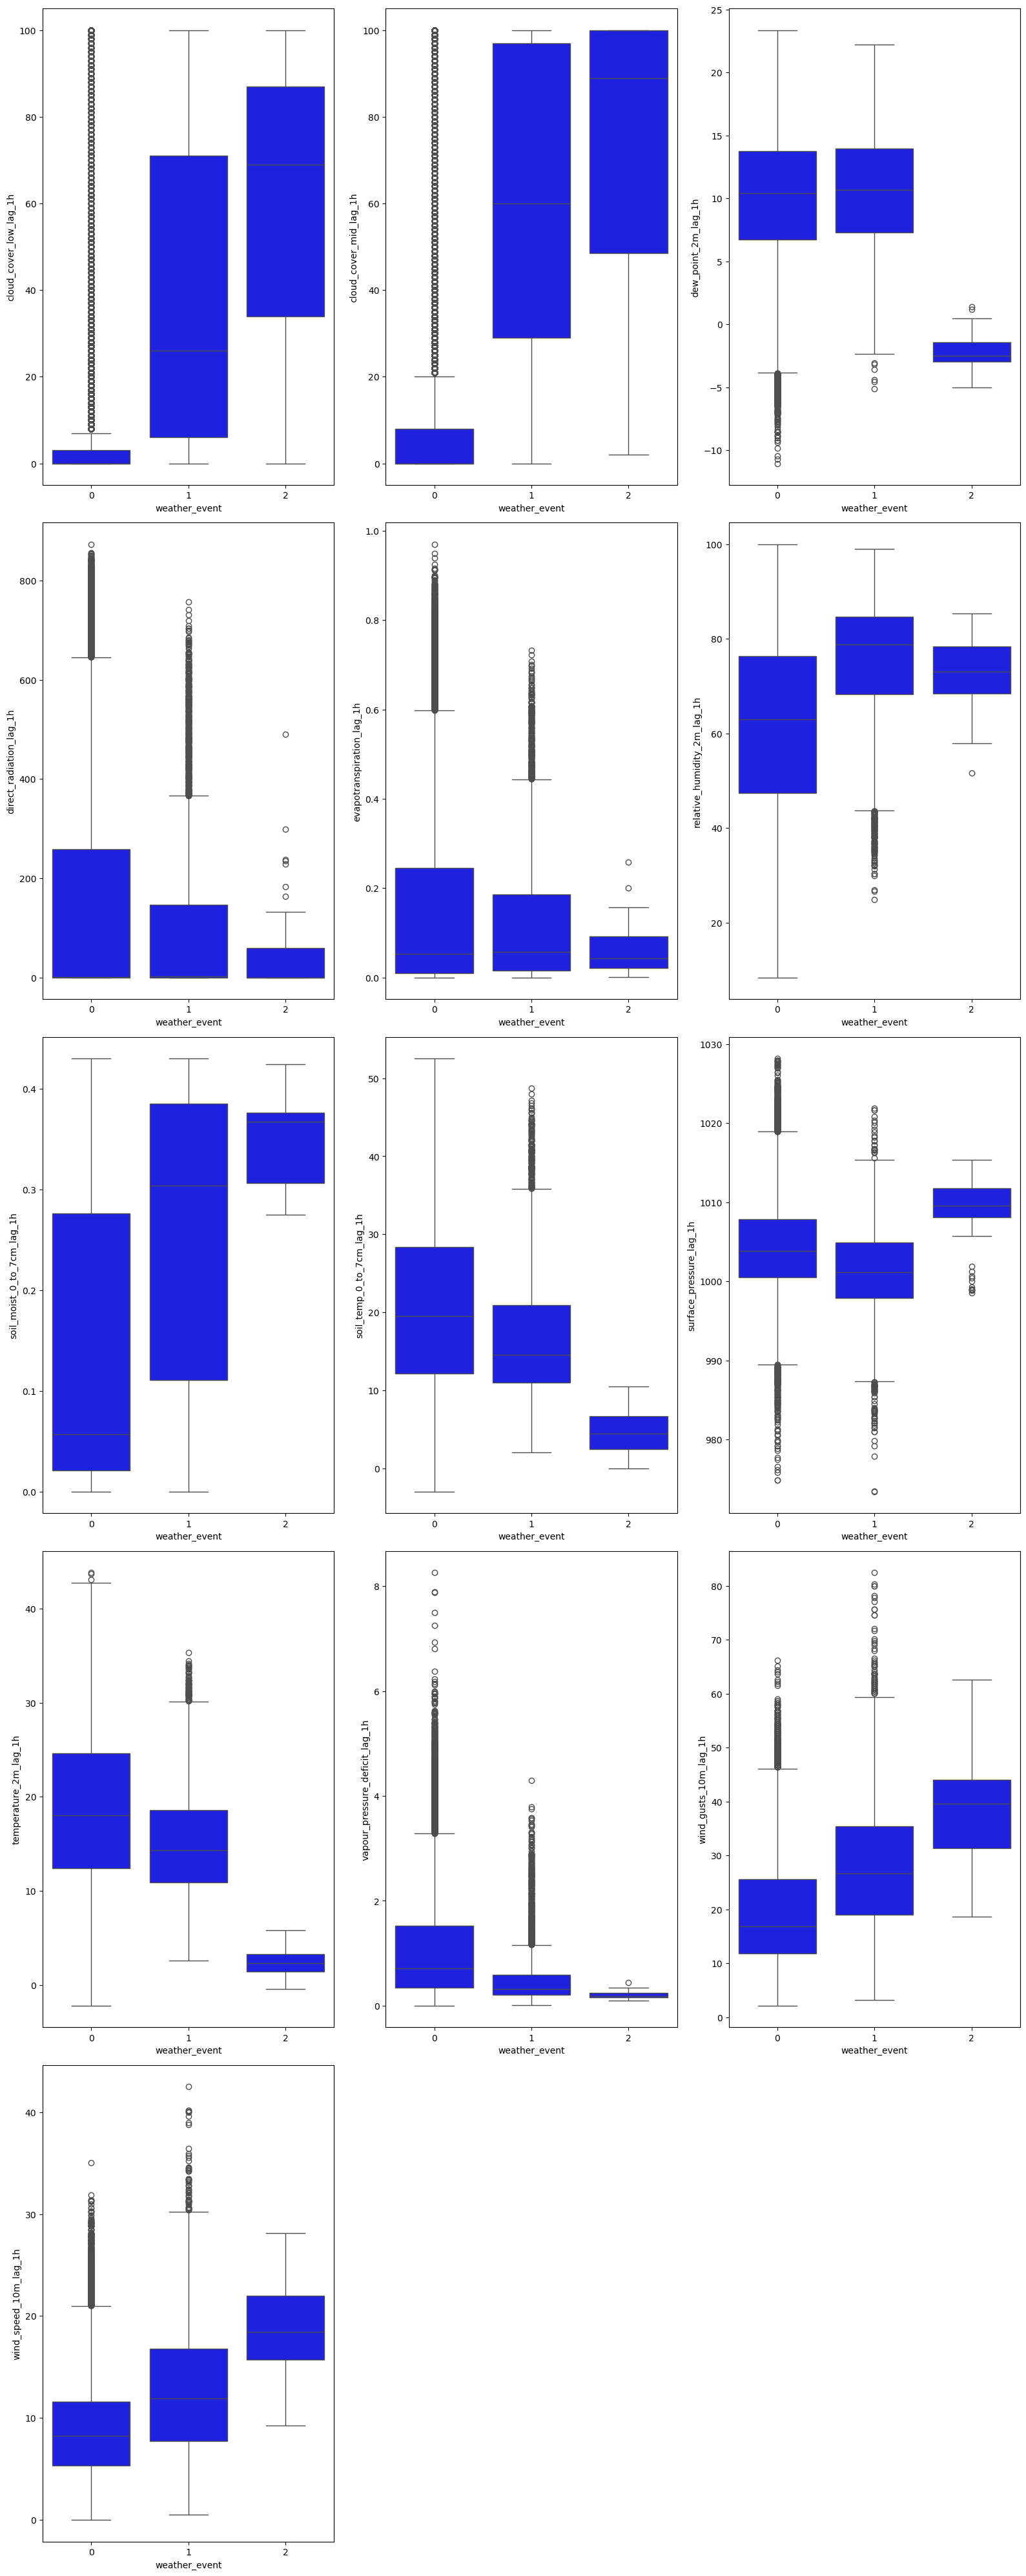

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of columns to plot
columns_to_plot = lagged_1h_df.columns.difference(['date', 'month_sin', 'month_cos', 'weather_event'])

figure = plt.figure(figsize=(16, 40))

# Loop through each column and create a boxplot with weather_event grouping
for i, col in enumerate(columns_to_plot, start=1):
    subplot = plt.subplot(len(columns_to_plot)//3 + 1, 3, i)  # Define a 3-column layout
    boxplot = sns.boxplot(data=lagged_1h_df, x='weather_event', y=col, color='blue')

# Adjust the layout
layout = plt.tight_layout()
plt.show()

Viewing the above box plots makes the presence of outliers more than obvious.
Whether these values represent measurement errors, anomalies, or valid extreme observations is uncertain.

With the **lack of fundamental domain knowledge**, access to the instruments used for the measurements, or the procedures followed, makes any kind of inference on the outliers impossible and arbitrarily removing or modifying them inserts more uncertainty in the project.

For this reason, it is better to retain all records, since even a simple action like removing the outliers is very likely to distort the distributions, insert more uncertainty in the project, introducing bias to the modeling process and alter the model's performance to unknown directions.   
We will try to mitigate their effect by using tools like robust scaling and Yeo-Johnson transformations.